In [47]:
import scanpy as sc
import scvi
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
adata = sc.read_h5ad('dataset.h5ad')

In [49]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [50]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2500, subset=True)

In [42]:
scvi.model.SCVI.setup_anndata(adata)
model = scvi.model.SCVI(adata, n_latent=20, gene_likelihood="nb")
model.train()

INFO     No batch_key inputted, assuming all cells are same batch                                                  
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.X                                                                                   
INFO     Successfully registered anndata object containing 10727 cells, 2500 vars, 1 batches, 1 labels, and 0      
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


C:\Users\hp\anaconda3\envs\scRNAseq_env\lib\site-packages\scvi\model\base\_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████████████████████████████████████████| 400/400 [08:33<00:00,  1.28s/it, loss=881, v_num=1]


C:\Users\hp\anaconda3\envs\scRNAseq_env\lib\site-packages\scvi\model\base\_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


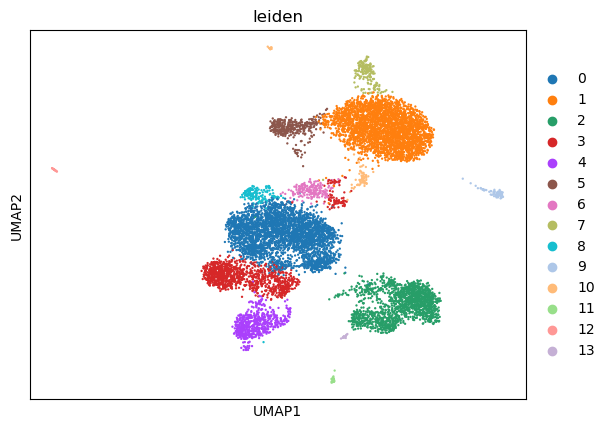

In [52]:
latent_rep = model.get_latent_representation()  # Correct method to get latents
latent_adata = sc.AnnData(latent_rep)
sc.pp.neighbors(latent_adata, n_neighbors=12, use_rep='X')
sc.tl.leiden(latent_adata, resolution=0.5)
sc.tl.umap(latent_adata)
sc.pl.umap(latent_adata, color=['leiden'])

In [44]:
output = pd.DataFrame({
    'Id': range(len(latent_adata.obs['leiden'])),
    'Label': latent_adata.obs['leiden'].astype(int) + 1
})
output.to_csv('scvi_optimized_clustering_results.csv', index=False)